In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

In [41]:
cutoff = 0.5
n_experiment = 100

ps = []
for n in 2**(np.array(range(18)) + 1): # for different number of n flips
    max_head_lst = []
    for i in range(n_experiment): # number of samples
        max_head = 0
        heads = 0

        flips = np.random.uniform(0, 1, size=n)
        for x in flips: # each flip in the experiment
            if x < 0.5:
                heads += 1
            else:
                heads = 0
            
            max_head = max(max_head, heads)

        max_head_lst.append(max_head)
    
    p = (np.abs(max_head_lst / np.log2(n) - 1) > 0.25).mean()
    p_std = np.sqrt((np.abs(max_head_lst / np.log2(n) - 1) > 0.25).var() / n_experiment)
    ps.append((n, p, p_std))

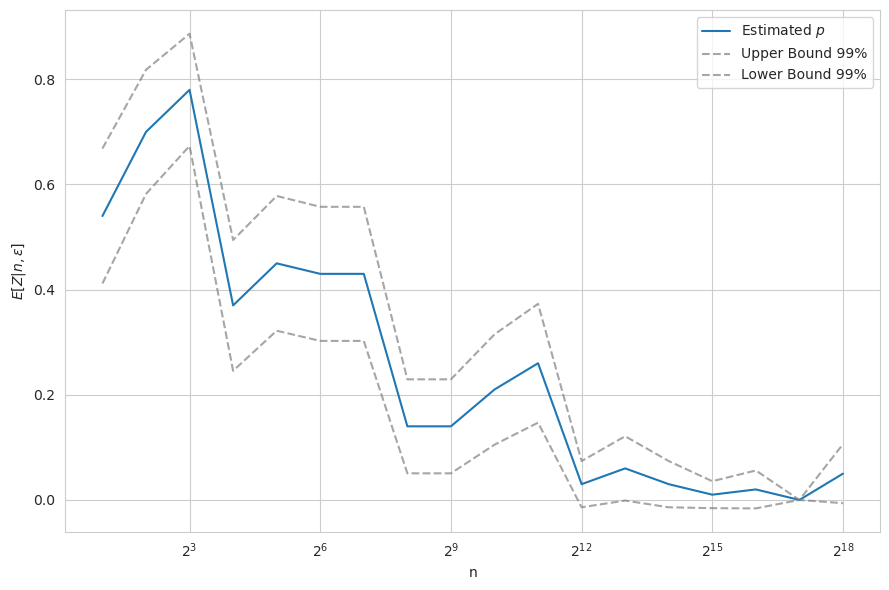

In [65]:
df = pd.DataFrame(ps, columns=['n', 'p', 'p_std']).set_index('n')

fig, ax = plt.subplots(figsize=(9, 6))
df.p.plot(ax=ax, label='Estimated $p$')
(df.p + df.p_std * 2.576).plot(ax=ax, label='Upper Bound 99%', linestyle='--', color='grey', alpha=0.7)
(df.p - df.p_std * 2.576).plot(ax=ax, label='Lower Bound 99%', linestyle='--', color='grey', alpha=0.7)

ax.set_xscale('log', base=2)
ax.legend()
ax.set_ylabel("$E[Z|n, \epsilon]$")
fig.tight_layout()

fig.show()